# Data Challenge

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Open Database

In [2]:
df = pd.read_excel('Data test - Program Data.xlsx').iloc[:,1:]

In [3]:
df.head()

,Program Name,Program Level,Unnamed: 3,Duration,URL,Program Overview
0,Environmental Health,Bachelor of Environmental Health,EHS,15.0,https://concordia.ab.ca/science/bachelor/envir...,Concordia University of Edmonton’s Environment...
1,Environmental Health,Bachelor of Environmental Health,EHS,15.0,https://concordia.ab.ca/science/bachelor/envir...,Open the door to an exciting career in diverse...
2,Environmental Public Health Practice,Graduate Diploma,Graduate Diploma,8.0,https://concordia.ab.ca/science/graduate/envir...,The practice of environmental public health is...
3,Drama,Bachelor of Arts,BA,36.0,https://concordia.ab.ca/arts/bachelor-programs...,At Concordia University of Edmonton we offer a...
4,English,Bachelor of Arts,BA,36.0,https://concordia.ab.ca/arts/bachelor-programs...,We offer an excellent program leading to 3-yea...


In [4]:
df.describe()

,Duration
count,52.000000
mean,37.653846
std,10.835462
min,8.000000
25%,36.000000
50%,36.000000
75%,48.000000
max,60.000000


In [7]:
df.isnull()

,Program Name,Program Level,Unnamed: 3,Duration,URL,Program Overview
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
65,False,False,False,True,False,False
66,False,False,False,True,False,False
67,False,False,False,True,False,False
68,False,False,False,True,False,False


In [10]:
df.isnull().value_counts()

Program Name  Program Level  Unnamed: 3  Duration  URL    Program Overview
False         False          False       False     False  False               52
                                         True      False  False               18
dtype: int64

So as we can see, the only serie that have any Nan value is the duration serie, so as long as we handle that value, we can use the information from duration to put it on the program overview

### Explore Dataset

Do some graphs to get some information about the values of Program Level and Name

<AxesSubplot:xlabel='Count', ylabel='Program Level'>

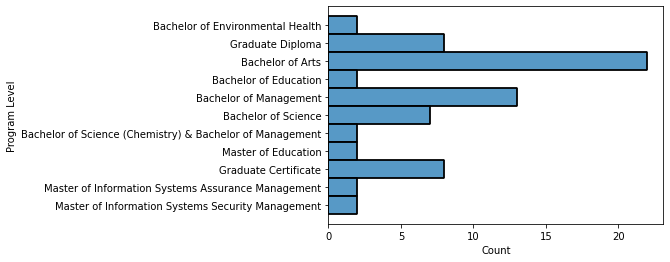

In [4]:
sns.histplot(data=df, y="Program Level")

<AxesSubplot:xlabel='Count', ylabel='Program Name'>

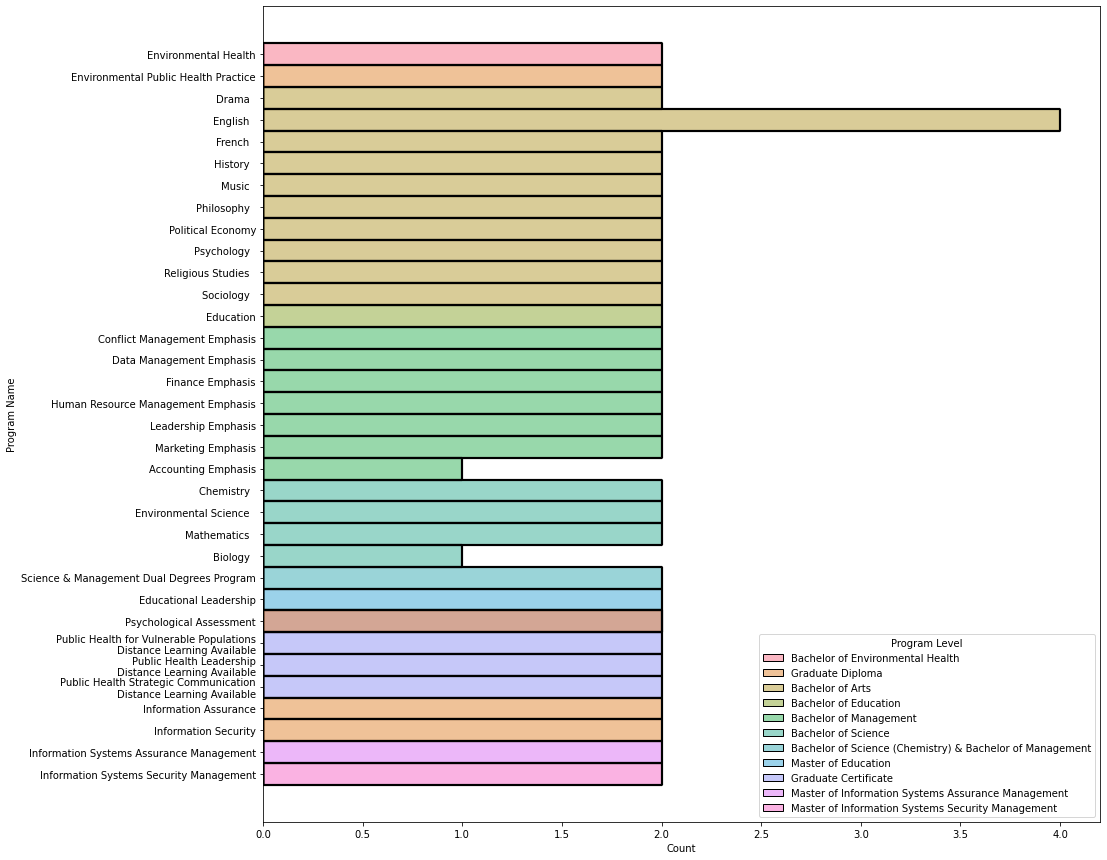

In [5]:
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(data=df, y="Program Name", hue="Program Level", ax=ax)

## Data Cleaning

Get the information that we need to clean this database

In [14]:
program_ov = []
for i in range(len(df)):
    phr = ""
    #print( df.iloc[i,3])
    if df.iloc[i,3] is int:
        program_ov.append("Conconrdia University of Edmond's "+ df.iloc[i,1]+" on "
                          +df.iloc[i,0]+" with a duration of " + str(int(df.iloc[i,3]))
                          +". If you want some more specific information, please check the next link: "+
                         df.iloc[i,4])
    
    else:
        program_ov.append("Conconrdia University of Edmond's "+ df.iloc[i,1]+" on "
                          +df.iloc[i,0]+
                        ". If you want some more specific information, please check the next link: "+
                         df.iloc[i,4])
    

In [26]:
new_db ={}
new_df = pd.DataFrame(new_db)

In [27]:
new_df['Program Name'] = df['Program Name']
new_df['Program Level'] = df['Unnamed: 3']
new_df['Program Overview'] = program_ov


In [28]:
new_df

,Program Name,Program Level,Program Overview
0,Environmental Health,EHS,Conconrdia University of Edmond's Bachelor of ...
1,Environmental Health,EHS,Conconrdia University of Edmond's Bachelor of ...
2,Environmental Public Health Practice,Graduate Diploma,Conconrdia University of Edmond's Graduate Dip...
3,Drama,BA,Conconrdia University of Edmond's Bachelor of ...
4,English,BA,Conconrdia University of Edmond's Bachelor of ...
...,...,...,...
65,Psychological Assessment,Graduate Diploma,Conconrdia University of Edmond's Graduate Dip...
66,Information Systems Assurance Management,MScIT,Conconrdia University of Edmond's Master of In...
67,Information Systems Assurance Management,MScIT,Conconrdia University of Edmond's Master of In...
68,Information Systems Security Management,MScIS,Conconrdia University of Edmond's Master of In...


## Summary

I wasn't sure with the Name thing, to remove the 'Majors', because on the column Program Name, there wasn't any major, also son the Program Level thing, just to switch columns, or there was any extra pre-processing thing. Finally with the overview, i was thinking to use a web scraper, but we can use the information from the dataframe and use the link to get to the real info.


In [29]:
new_df.to_excel('DataCH.xlsx')